In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
!pip install svgling
nltk.download('vader_lexicon')

plt.style.use('ggplot')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/smridwanulhaque/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('Reviews.csv')
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
df['Text'].values[50]

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [4]:
df['Score'].values[50]

1

In [5]:
reduced_df = df.head(500)
reduced_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


<Axes: title={'center': 'Ratings Distribution By Stars'}>

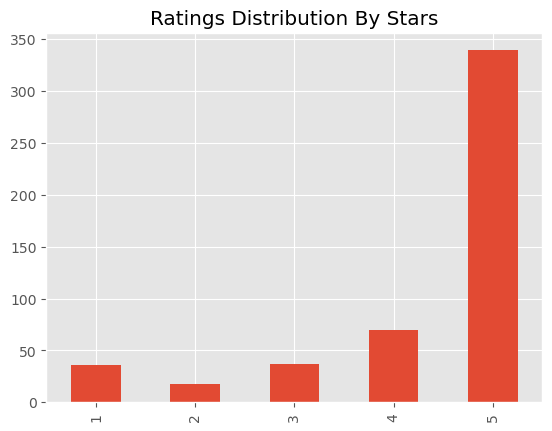

In [6]:
reduced_df['Score'].value_counts().sort_index().plot(kind = "bar", title = "Ratings Distribution By Stars")

In [7]:
ex = df['Text'].values[50]
tokens = nltk.word_tokenize(ex)

In [8]:
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

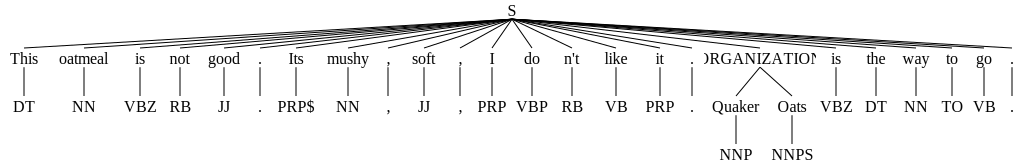

In [9]:
nltk.chunk.ne_chunk(tagged)

#Using VADER

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [11]:
#testing
sia.polarity_scores('This food is really bad')

{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.5849}

In [12]:
res = {} #dictionary to store 
for i, row in tqdm(reduced_df.iterrows(), total = len(reduced_df)):
    text = row['Text']
    myId = row['Id']
    res[myId] = sia.polarity_scores(text)

    

  0%|          | 0/500 [00:00<?, ?it/s]

In [13]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [14]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0550,0.0000,0.0560,0.1000,0.0000,0.0000,0.0590,0.0250,0.041,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.7040,0.7170,0.8550,0.6450,0.7880,0.5540,0.7990,0.7620,0.904,0.6780
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2410,0.2830,0.0890,0.2540,0.2120,0.4460,0.1420,0.2120,0.055,0.3220
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9287,0.9367,0.5976,0.6486,0.9743,0.9725,0.7833,0.9848,0.128,0.9811


In [15]:
vaders = pd.DataFrame(res).T

vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [16]:
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [17]:
vaders = vaders.merge(reduced_df,how="left")
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [18]:
vaders = vaders.sort_values(by='compound', ascending=False)
vaders.head(20)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
82,83,0.040,0.794,0.165,0.9957,B003ZFRKGO,A2VOZX7YBT0D6D,"Johnnycakes ""Johnnycakes""",15,15,5,1325635200,Forget Molecular Gastronomy - this stuff rocke...,I know the product title says Molecular Gastro...
112,113,0.037,0.786,0.177,0.9946,B0037LW78C,A2F65U0UDY7TAW,Aldo,2,2,5,1337990400,My every day green tea,I have been drinking Royal King 100% Natural O...
186,187,0.016,0.842,0.142,0.9944,B000NY8ODS,A1IU7S4HCK1XK0,Joanna Daneman,2,2,5,1333843200,"Make a fresh fruit tart, light and beautiful",This packet of glaze is the secret to making t...
237,238,0.029,0.798,0.174,0.9936,B000WFRMRW,A3Q7QBDSAZ670I,B. Barnett,0,0,4,1331251200,High Quality... But it gave my dog wicked gas..,The recommendation when we bought our puppies ...
479,480,0.000,0.435,0.565,0.9935,B000G6RYNE,A1RRHET1QIP1YK,Daniel Hill,0,0,5,1215302400,Great Chip!,"I don't eat many chips, but these I love. Grea..."
467,468,0.008,0.818,0.174,0.9926,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"Crunchy, salty, sweet...finally, a Superbowl s...",These Honey Dijon chips bring a terrific balan...
370,371,0.012,0.860,0.128,0.9923,B002O3VHXU,A2TJG4N8LNJW23,Blythe Dresser,0,0,4,1327104000,A saving grace for Green Mountain Coffee...,When we received our Keurig Elite for Christma...
383,384,0.027,0.780,0.193,0.9913,B000UXA3L8,A25C2M3QF9G7OQ,Comdet,0,0,5,1335139200,"Excellent flavor, mostly large pieces",I was pretty pleased with these mushrooms. The...
28,29,0.022,0.669,0.309,0.9913,B00144C10S,A2F4LZVGFLD1OB,DaisyH,0,0,5,1338854400,YUMMY!,I got this for my Mum who is not diabetic but ...
173,174,0.022,0.788,0.189,0.9901,B0081XN2HQ,A3HUV0ZQPXO3V7,Pink Dandy Chatter,0,0,5,1344902400,"Fluffy, Soft, Delicious and Sugary Sweet",I couldn't wait to try the 8&#8243; Cinnamon C...


In [23]:
def count_words(text):
    return len(text.split())

# Apply the function to create a new column
vaders['word_count'] = vaders['Text'].apply(lambda x: count_words(x))

# Display the DataFrame with the new column
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count
82,83,0.040,0.794,0.165,0.9957,B003ZFRKGO,A2VOZX7YBT0D6D,"Johnnycakes ""Johnnycakes""",15,15,5,1325635200,Forget Molecular Gastronomy - this stuff rocke...,I know the product title says Molecular Gastro...,430
112,113,0.037,0.786,0.177,0.9946,B0037LW78C,A2F65U0UDY7TAW,Aldo,2,2,5,1337990400,My every day green tea,I have been drinking Royal King 100% Natural O...,334
186,187,0.016,0.842,0.142,0.9944,B000NY8ODS,A1IU7S4HCK1XK0,Joanna Daneman,2,2,5,1333843200,"Make a fresh fruit tart, light and beautiful",This packet of glaze is the secret to making t...,405
237,238,0.029,0.798,0.174,0.9936,B000WFRMRW,A3Q7QBDSAZ670I,B. Barnett,0,0,4,1331251200,High Quality... But it gave my dog wicked gas..,The recommendation when we bought our puppies ...,291
479,480,0.000,0.435,0.565,0.9935,B000G6RYNE,A1RRHET1QIP1YK,Daniel Hill,0,0,5,1215302400,Great Chip!,"I don't eat many chips, but these I love. Grea...",48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,0.150,0.773,0.077,-0.9037,B001UJEN6C,ATN552TF5V40Z,Lh,1,5,1,1326758400,So awful I can barely describe,This is the first time I've really been misled...,116
403,404,0.194,0.771,0.035,-0.9058,B006CGURWM,A3F5EUYWKVWPJ6,southernboy,0,0,1,1342915200,disappointing,Perhaps the worst bottle of wine I've ever had...,85
67,68,0.183,0.776,0.041,-0.9116,B005DUM9UQ,A8OFFIAL6XTOH,Bill Shirer,0,1,2,1338422400,Taste is not so good.,"I purchased the Mango flavor, and to me it doe...",87
263,264,0.098,0.875,0.026,-0.9218,B000LKZK7C,A25YQEBU2FAD3M,Scott Dixon,4,5,3,1295222400,Manufacturing Problems Diminish Product,I have used and liked Sugar in the Raw for man...,208


In [25]:
unique_product_count = reduced_df['ProductId'].nunique()
unique_product_count

136